In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import nltk
from sklearn import preprocessing

In [2]:
data = pd.read_csv('final_dataset.csv',names=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
data.drop(index=data.index[0], 
        axis=0, 
        inplace=True)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,urban,14,2098224,2133952,516096,458752,69504,224,72,9,224,192,4,130944
2,urban,14,3,2133952,4096,1081344,69632,6,80,8,7936,156,3,1
3,urban,448,2080768,2158592,4096,458752,124,1536,72,9,224,156,8,130944
4,urban,48,960,2158592,516096,1605568,69632,224,96,32,7936,192,4,49214
5,urban,33,2098224,2158592,262175,1605568,69504,1536,80,20,224,160,8,49214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,urban,448,2080768,2097212,4096,1605568,57344,256,80,20,7936,192,4,130944
496,rural,14,3,2158592,516096,1081344,69632,1536,80,32,7936,160,2,49214
497,urban,448,2111488,2031616,3584,458752,57344,256,72,32,7936,192,8,130944
498,urban,48,2080768,2158592,4096,1,69504,256,80,18,7936,192,4,130944


In [4]:
d = data[[1,2,3,5,7,8,9,10,11,12,13]]
d

,1,2,3,5,7,8,9,10,11,12,13
1,14,2098224,2133952,458752,224,72,9,224,192,4,130944
2,14,3,2133952,1081344,6,80,8,7936,156,3,1
3,448,2080768,2158592,458752,1536,72,9,224,156,8,130944
4,48,960,2158592,1605568,224,96,32,7936,192,4,49214
5,33,2098224,2158592,1605568,1536,80,20,224,160,8,49214
...,...,...,...,...,...,...,...,...,...,...,...
495,448,2080768,2097212,1605568,256,80,20,7936,192,4,130944
496,14,3,2158592,1081344,1536,80,32,7936,160,2,49214
497,448,2111488,2031616,458752,256,72,32,7936,192,8,130944
498,48,2080768,2158592,1,256,80,18,7936,192,4,130944


In [5]:
objective_function=[] 
for i in range(1,15):
    clustering=KMeans(n_clusters=i, init='k-means++')
    clustering.fit(d)
    objective_function.append(clustering.inertia_)

In [6]:
objective_function

[555189881221556.56,
 131520297571299.31,
 52669468890535.305,
 26894034588693.473,
 14457994626427.57,
 8346028292913.828,
 4164495049141.539,
 2282023521510.206,
 1912887806748.0684,
 1686153467322.2563,
 1466267129378.668,
 1314808995026.1934,
 1190964409430.0337,
 1141582841228.5554]

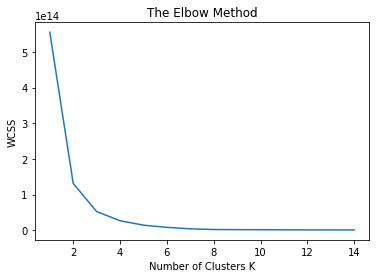

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1,15),objective_function)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('WCSS')
plt.show()

In [24]:
obj = pd.DataFrame(objective_function)
obj.values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
scaled_obj = scaled.fit_transform(obj)

In [26]:
scaled_obj

array([[1.00000000e+00],
       [2.35320125e-01],
       [9.30025166e-02],
       [4.64805177e-02],
       [2.40347490e-02],
       [1.30032805e-02],
       [5.45604457e-03],
       [2.05837773e-03],
       [1.39212586e-03],
       [9.82893780e-04],
       [5.86021632e-04],
       [3.12655330e-04],
       [8.91286344e-05],
       [0.00000000e+00]])

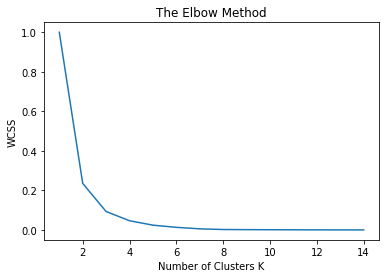

In [25]:
plt.plot(range(1,15),scaled_obj)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters K')
plt.ylabel('WCSS')
plt.show()

In [9]:
km=KMeans(n_clusters=3, init='k-means++',max_iter=1000)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
y_predict = km.fit_predict(d)

In [11]:
y_predict

array([2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0,
       0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2,
       2, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2,
       2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 2, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2,
       2, 2, 0, 2, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 0,
       1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1,

In [16]:
new_data = d
new_data['label'] = y_predict

C:\Users\chandan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
new_data["label"].value_counts()

2    188
1    181
0    130
Name: label, dtype: int64